<a href="https://colab.research.google.com/github/leokan92/Contextual-bandit-Resnet-trading/blob/main/Aula_1_S%C3%A9ries_de_Tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula de Séries de Tempo



##Componentes de uma série de tempo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

###Tendência

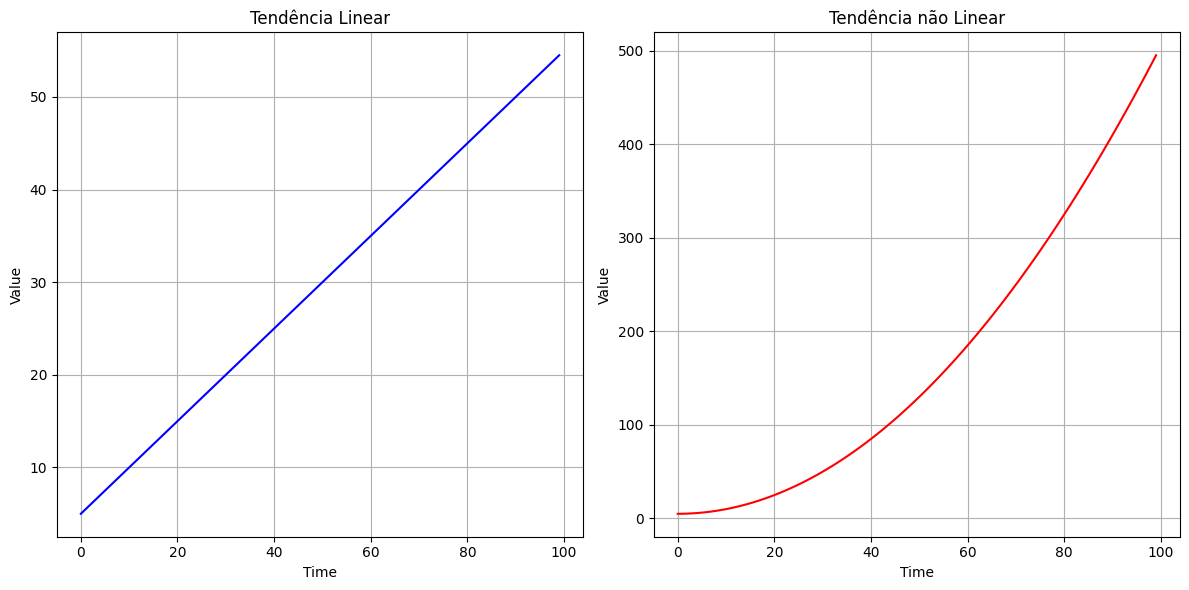

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados para tendência linear
time_linear = np.arange(100)
trend_linear = 0.5 * time_linear + 5  # Tendência linear: y = 0.5x + 5

# Gerar dados para tendência não linear (quadrática)
time_nonlinear = np.arange(100)
trend_nonlinear = 0.05 * time_nonlinear**2 + 5  # Tendência não linear: y = 0.05x^2 + 5

# Plotar as tendências
plt.figure(figsize=(12, 6))

# Plotar tendência linear
plt.subplot(1, 2, 1)
plt.plot(time_linear, trend_linear, label='Linear Trend', color='blue')
plt.title('Tendência Linear')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

# Plotar tendência não linear
plt.subplot(1, 2, 2)
plt.plot(time_nonlinear, trend_nonlinear, label='Non-linear Trend', color='red')
plt.title('Tendência não Linear')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()

###Sazonalidade

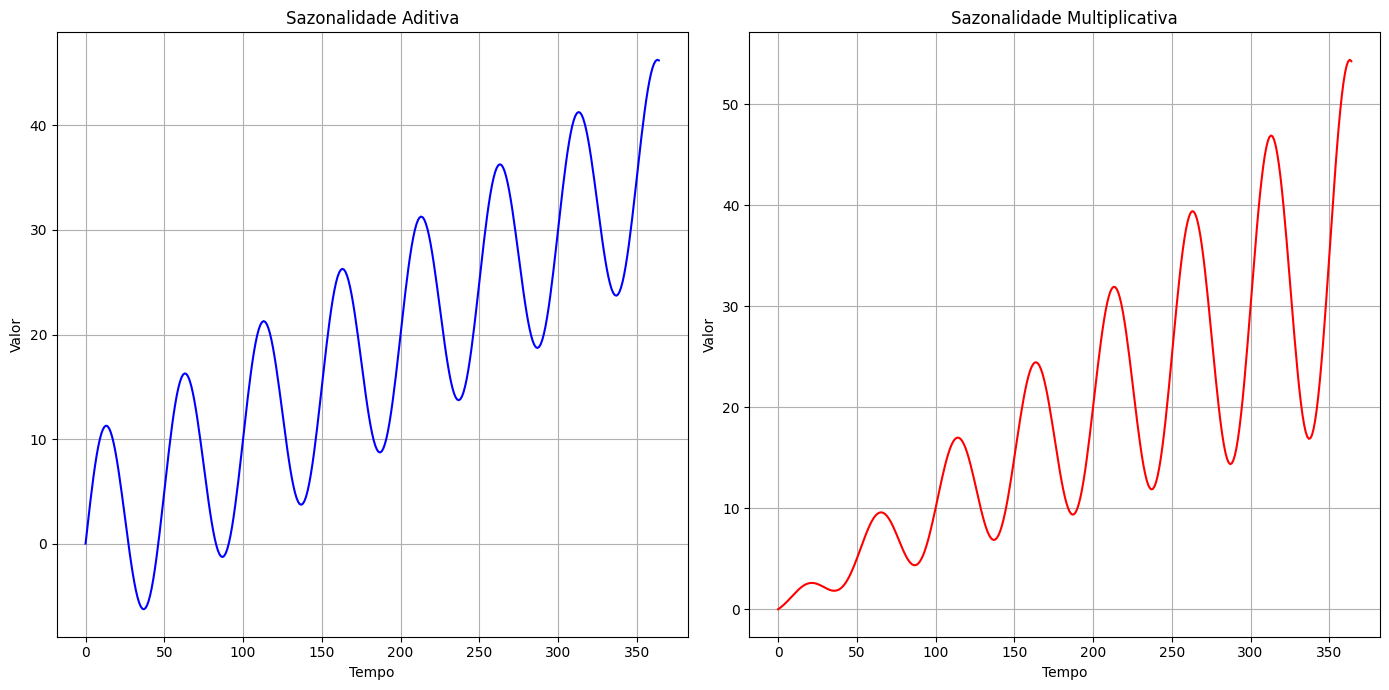

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurando o tempo e a tendência
time = np.arange(365)
trend = 0.1 * time  # Tendência linear simples

# Configurando a sazonalidade
seasonal_additive = 10 * np.sin(2 * np.pi * time / 50)  # Sazonalidade aditiva
seasonal_multiplicative = 1 + 0.5 * np.sin(2 * np.pi * time / 50)  # Sazonalidade multiplicativa

# Gerando as séries
series_additive = trend + seasonal_additive  # Série com sazonalidade aditiva
series_multiplicative = trend * seasonal_multiplicative  # Série com sazonalidade multiplicativa

# Plotando as séries
plt.figure(figsize=(14, 7))

# Sazonalidade Aditiva
plt.subplot(1, 2, 1)
plt.plot(time, series_additive, label='Aditiva', color='blue')
plt.title('Sazonalidade Aditiva')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)

# Sazonalidade Multiplicativa
plt.subplot(1, 2, 2)
plt.plot(time, series_multiplicative, label='Multiplicativa', color='red')
plt.title('Sazonalidade Multiplicativa')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)

plt.tight_layout()
plt.show()


###Ciclos

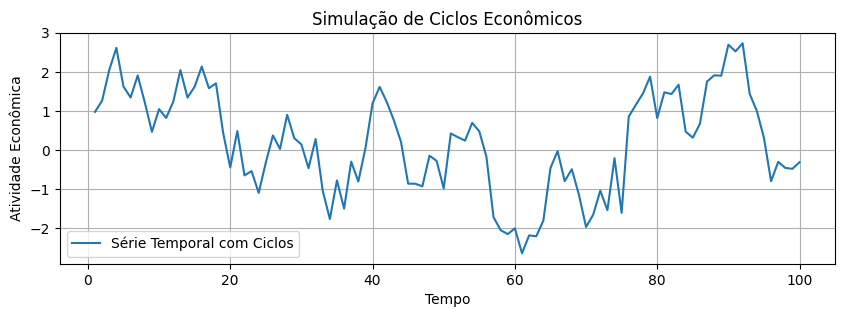

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configuração da série temporal
np.random.seed(42)
time = np.arange(1, 101)

# Simulando ciclos econômicos: combinando múltiplos senos com frequências variadas
cycle = np.sin(time / 2) + np.sin(time / 6) + np.sin(time / 12) + 0.5 * np.random.normal(size=time.size)

# Adicionando uma tendência linear para complexidade
trend = time * 0.2

# Combinando tendência e ciclos
series = cycle #trend + cycle

# Plotando a série temporal
plt.figure(figsize=(10, 3))
plt.plot(time, series, label='Série Temporal com Ciclos')
plt.title('Simulação de Ciclos Econômicos')
plt.xlabel('Tempo')
plt.ylabel('Atividade Econômica')
plt.legend()
plt.grid(True)
plt.show()


###Irregularidades



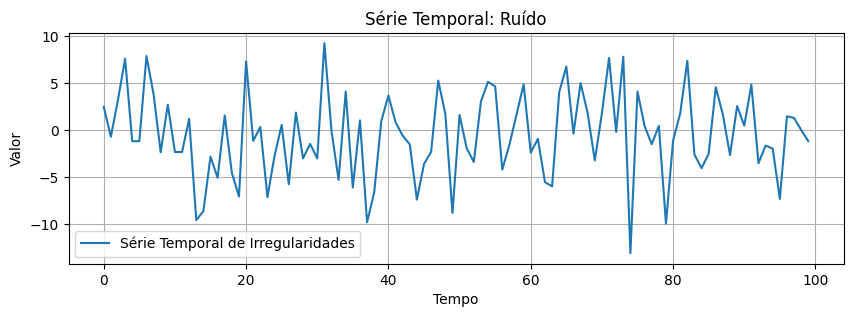

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configuração da série temporal
np.random.seed(42)
time = np.arange(100)
trend = 0.5 * time  # Tendência linear
seasonality = 10 * np.sin(time / 10)  # Sazonalidade com função seno

# Gerando o componente irregular
noise = np.random.normal(scale=5, size=time.size)  # Ruído com desvio padrão 5

# Combinando os componentes para formar a série temporal
series = noise #trend + seasonality + noise

# Plotando a série temporal
plt.figure(figsize=(10, 3))
plt.plot(time, series, label='Série Temporal de Irregularidades')
plt.title('Série Temporal: Ruído')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


##Técnicas descritivas

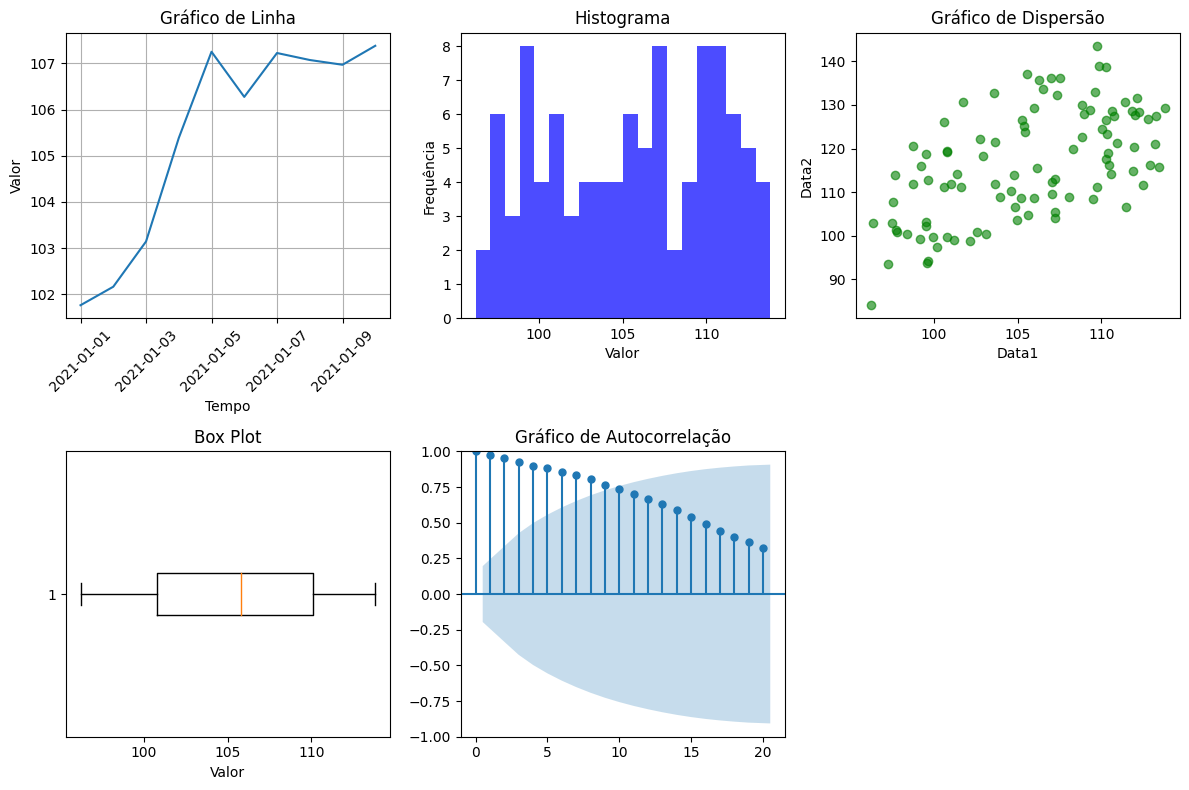

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# Gerando uma série temporal para exemplo
np.random.seed(0)
data = np.cumsum(np.random.randn(100)) + 100  # Série com tendência crescente e ruído

# Criando uma segunda série temporal para exemplo de gráfico de dispersão
data2 = data + np.random.normal(10, 10, size=100)

# Criando um DataFrame
df = pd.DataFrame({'Data1': data, 'Data2': data2}, index=pd.date_range(start="2021-01-01", periods=100))

# Plotando gráfico de linha
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(df.index[:10], df['Data1'][:10], label='Data1')
plt.title('Gráfico de Linha')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.xticks(df.index[:10:2], labels=pd.to_datetime(df.index[:10:2]).strftime('%Y-%m-%d'), rotation=45)  # Ajustando a frequência dos labels


# Plotando histograma
plt.subplot(2, 3, 2)
plt.hist(df['Data1'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Plotando gráfico de dispersão
plt.subplot(2, 3, 3)
plt.scatter(df['Data1'], df['Data2'], alpha=0.6, color='green')
plt.title('Gráfico de Dispersão')
plt.xlabel('Data1')
plt.ylabel('Data2')

# Plotando Box Plot
plt.subplot(2, 3, 4)
plt.boxplot(df['Data1'], vert=False)
plt.title('Box Plot')
plt.xlabel('Valor')

# Plotando gráfico de autocorrelação
plt.subplot(2, 3, 5)
plot_acf(df['Data1'], ax=plt.gca(), lags=20)
plt.title('Gráfico de Autocorrelação')

plt.tight_layout()
plt.show()


##Modelo básico

<Figure size 1200x800 with 0 Axes>

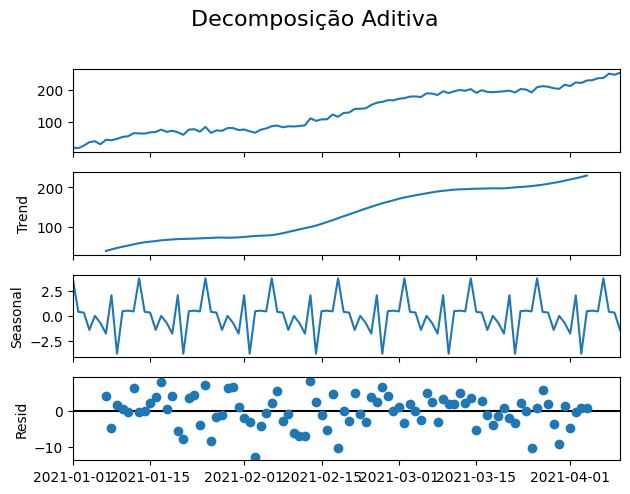

<Figure size 1200x800 with 0 Axes>

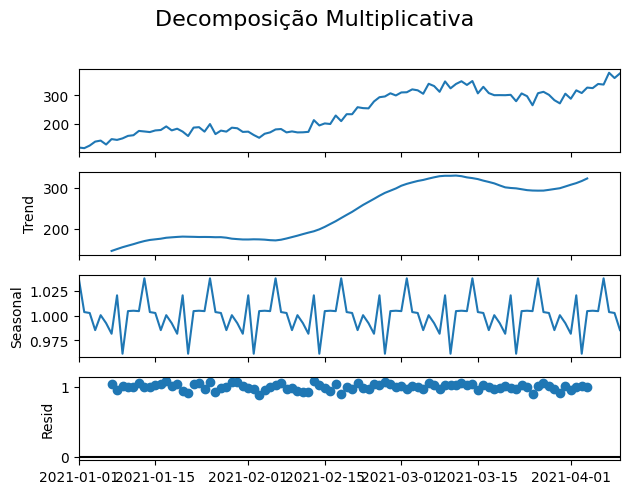

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Gerar dados sintéticos
np.random.seed(0)
time = np.linspace(0, 99, 100)
trend = time * 2.5  # Tendência linear
seasonality = 10 + 20 * np.sin(time / 8)  # Sazonalidade sinoidal
noise = np.random.normal(scale=5, size=time.size)  # Ruído

# Modelo aditivo
data_additive = trend + seasonality + noise
df_additive = pd.DataFrame(data_additive, index=pd.date_range("2021-01-01", periods=100), columns=['Value'])

# Modelo multiplicativo - garantindo que todos os valores sejam positivos
data_multiplicative = (trend + 100) * (1 + seasonality / 100) * (1 + noise / 100)
df_multiplicative = pd.DataFrame(data_multiplicative, index=pd.date_range("2021-01-01", periods=100), columns=['Value'])

# Decomposição aditiva
plt.figure(figsize=(12, 8))  # Ajustando o tamanho da figura
result_additive = seasonal_decompose(df_additive, model='additive', period=12)
result_additive.plot().suptitle('Decomposição Aditiva', fontsize=16, y=1.02)  # Ajuste para título
plt.tight_layout()
plt.show()

# Decomposição multiplicativa
plt.figure(figsize=(12, 8))  # Ajustando o tamanho da figura
result_multiplicative = seasonal_decompose(df_multiplicative, model='multiplicative', period=12)
result_multiplicative.plot().suptitle('Decomposição Multiplicativa', fontsize=16, y=1.02)  # Ajuste para título
plt.tight_layout()
plt.show()


##Processo Estocástico

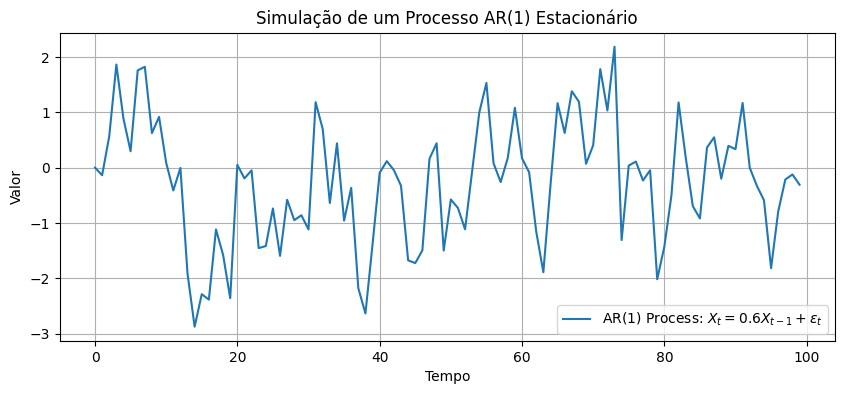

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo AR(1)
phi = 0.6
sigma = 1
n = 100

# Gerando um processo AR(1)
np.random.seed(42)
epsilon = np.random.normal(0, sigma, n)
X = np.zeros(n)
for t in range(1, n):
    X[t] = phi * X[t-1] + epsilon[t]

# Plotando o processo
plt.figure(figsize=(10, 4))
plt.plot(X, label=f'AR(1) Process: $X_t = {phi}X_{{t-1}} + \epsilon_t$')
plt.title('Simulação de um Processo AR(1) Estacionário')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


### Tipos de Processos estocásticos

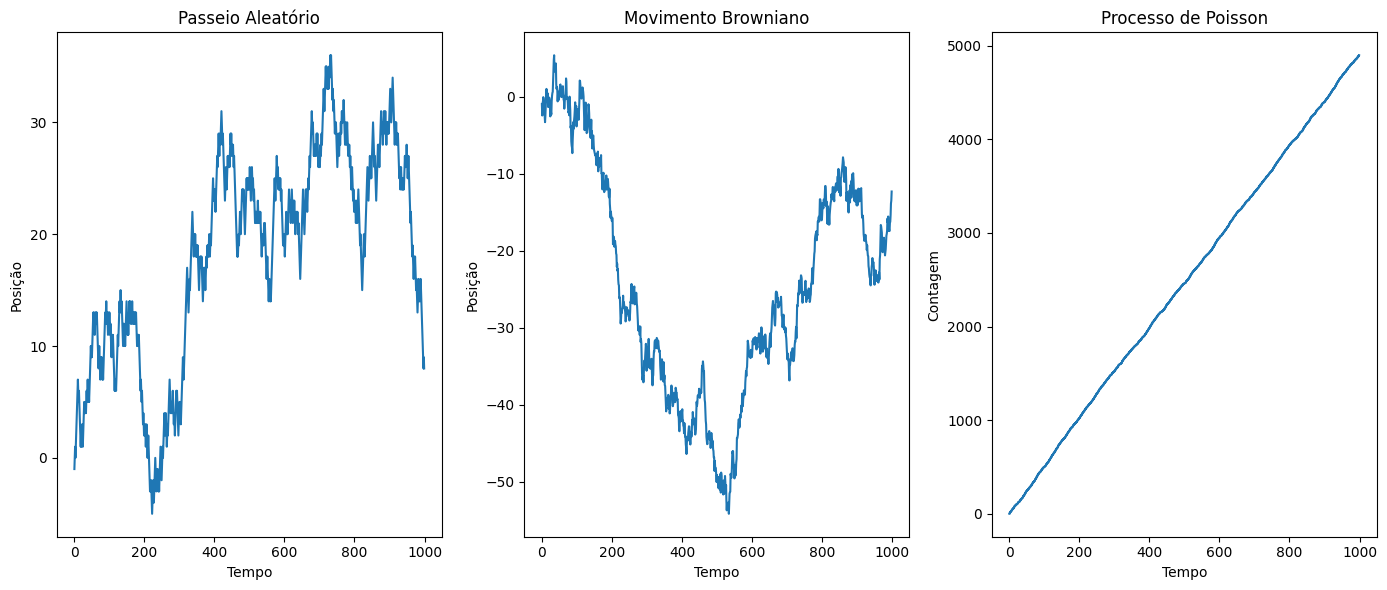

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 1000

# Passeio Aleatório
steps = np.random.choice([-1, 1], size=n)
walk = np.cumsum(steps)  # Soma cumulativa das etapas

# Movimento Browniano
dt = 1
brownian = np.cumsum(np.random.normal(0, np.sqrt(dt), size=n))

# Processo de Poisson
lam = 5
poisson = np.random.poisson(lam, size=n)
poisson_walk = np.cumsum(poisson)

# Plotando os processos estocásticos
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(walk, label='Passeio Aleatório')
plt.title('Passeio Aleatório')
plt.xlabel('Tempo')
plt.ylabel('Posição')

plt.subplot(1, 3, 2)
plt.plot(brownian, label='Movimento Browniano')
plt.title('Movimento Browniano')
plt.xlabel('Tempo')
plt.ylabel('Posição')

plt.subplot(1, 3, 3)
plt.step(range(n), poisson_walk, where='post', label='Processo de Poisson')
plt.title('Processo de Poisson')
plt.xlabel('Tempo')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


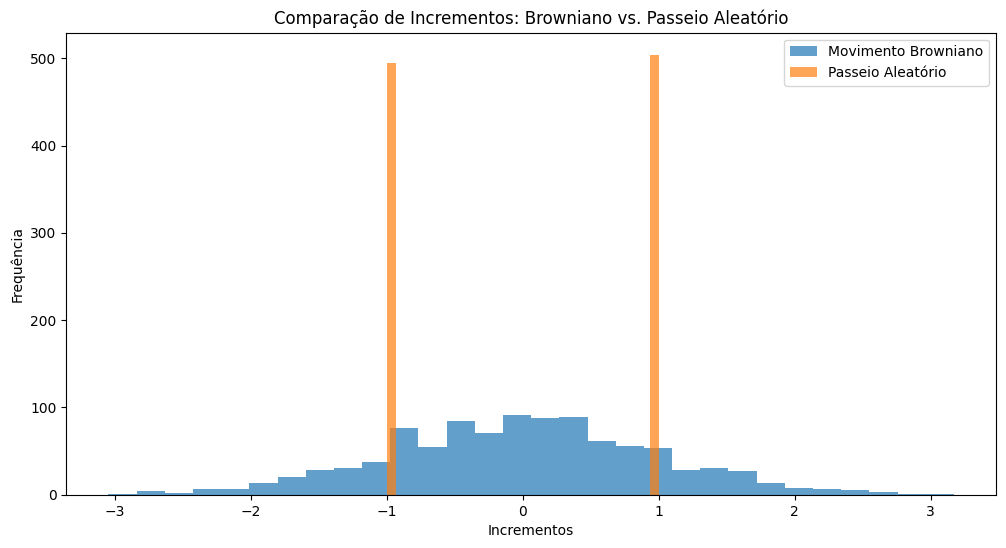

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma para Movimento Browniano
plt.hist(np.diff(brownian), bins=30, alpha=0.7, label='Movimento Browniano')

# Histograma para Passeio Aleatório
plt.hist(np.diff(walk), bins=30, alpha=0.7, label='Passeio Aleatório')

plt.title('Comparação de Incrementos: Browniano vs. Passeio Aleatório')
plt.xlabel('Incrementos')
plt.ylabel('Frequência')
plt.legend()

plt.show()

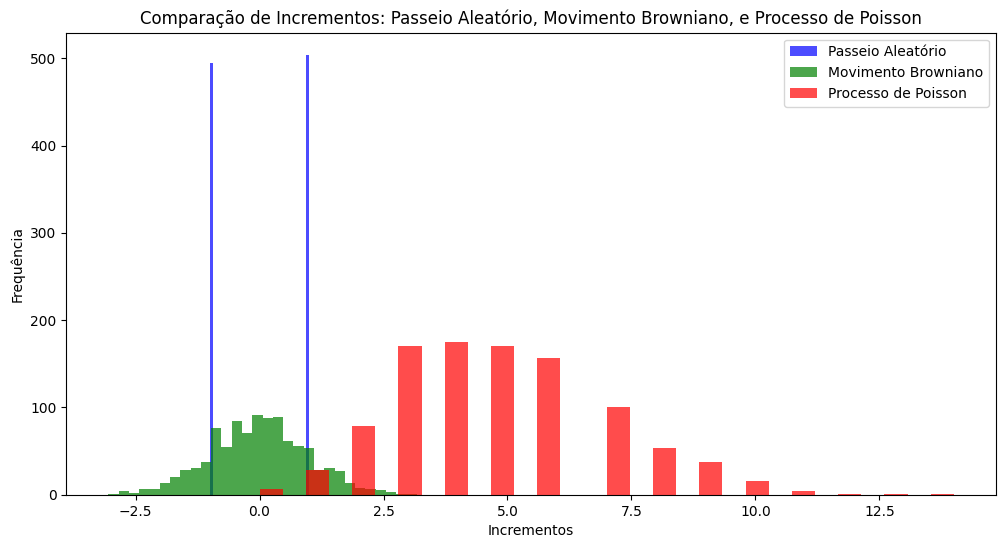

In [ ]:
# Gerando histogramas para comparar os incrementos dos três processos estocásticos
plt.figure(figsize=(12, 6))

# Histograma para o Passeio Aleatório
plt.hist(np.diff(walk), bins=30, alpha=0.7, label='Passeio Aleatório', color='blue')

# Histograma para o Movimento Browniano
plt.hist(np.diff(brownian), bins=30, alpha=0.7, label='Movimento Browniano', color='green')

# Histograma para o Processo de Poisson - usando os incrementos
plt.hist(np.diff(poisson_walk), bins=30, alpha=0.7, label='Processo de Poisson', color='red')

plt.title('Comparação de Incrementos: Passeio Aleatório, Movimento Browniano, e Processo de Poisson')
plt.xlabel('Incrementos')
plt.ylabel('Frequência')
plt.legend()

plt.show()


###Estacionariedade fraca

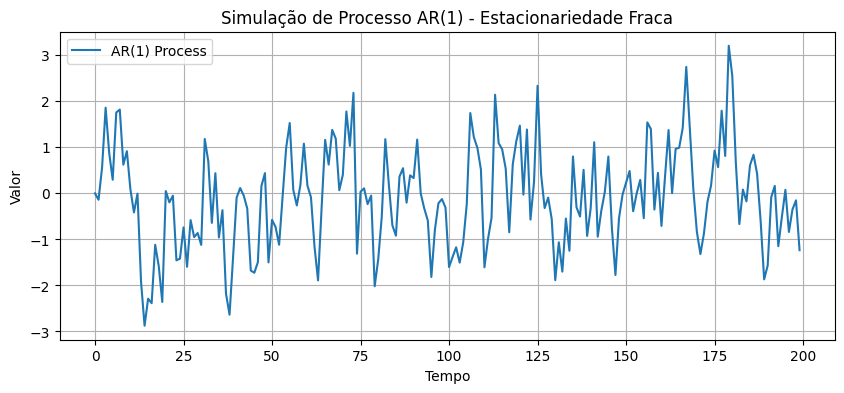

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo AR(1)
phi = 0.6
sigma = 1
n = 200

# Gerando um processo AR(1)
np.random.seed(42)
epsilon = np.random.normal(0, sigma, n)
X_fraca = np.zeros(n)
for t in range(1, n):
    X_fraca[t] = phi * X_fraca[t-1] + epsilon[t]

# Plotando o processo estacionário fraco
plt.figure(figsize=(10, 4))
plt.plot(X_fraca, label='AR(1) Process')
plt.title('Simulação de Processo AR(1) - Estacionariedade Fraca')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


###Estacionariedade estrita

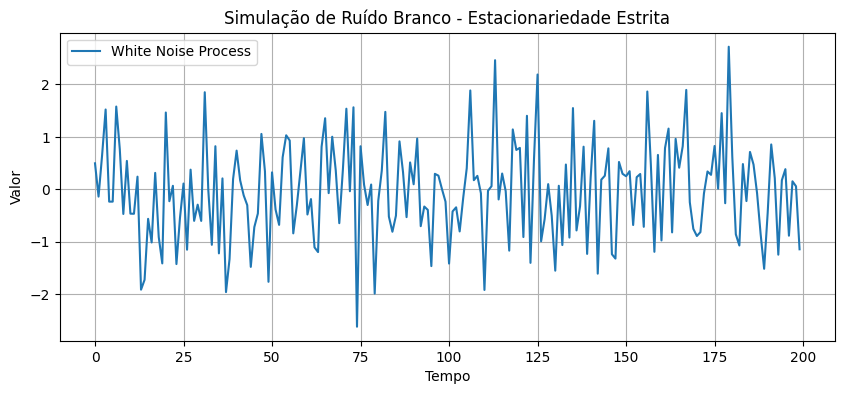

In [ ]:
# Gerando ruído branco
np.random.seed(42)
X_estrita = np.random.normal(0, 1, n)  # média 0, desvio padrão 1

# Plotando o ruído branco
plt.figure(figsize=(10, 4))
plt.plot(X_estrita, label='White Noise Process')
plt.title('Simulação de Ruído Branco - Estacionariedade Estrita')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


##Tendência

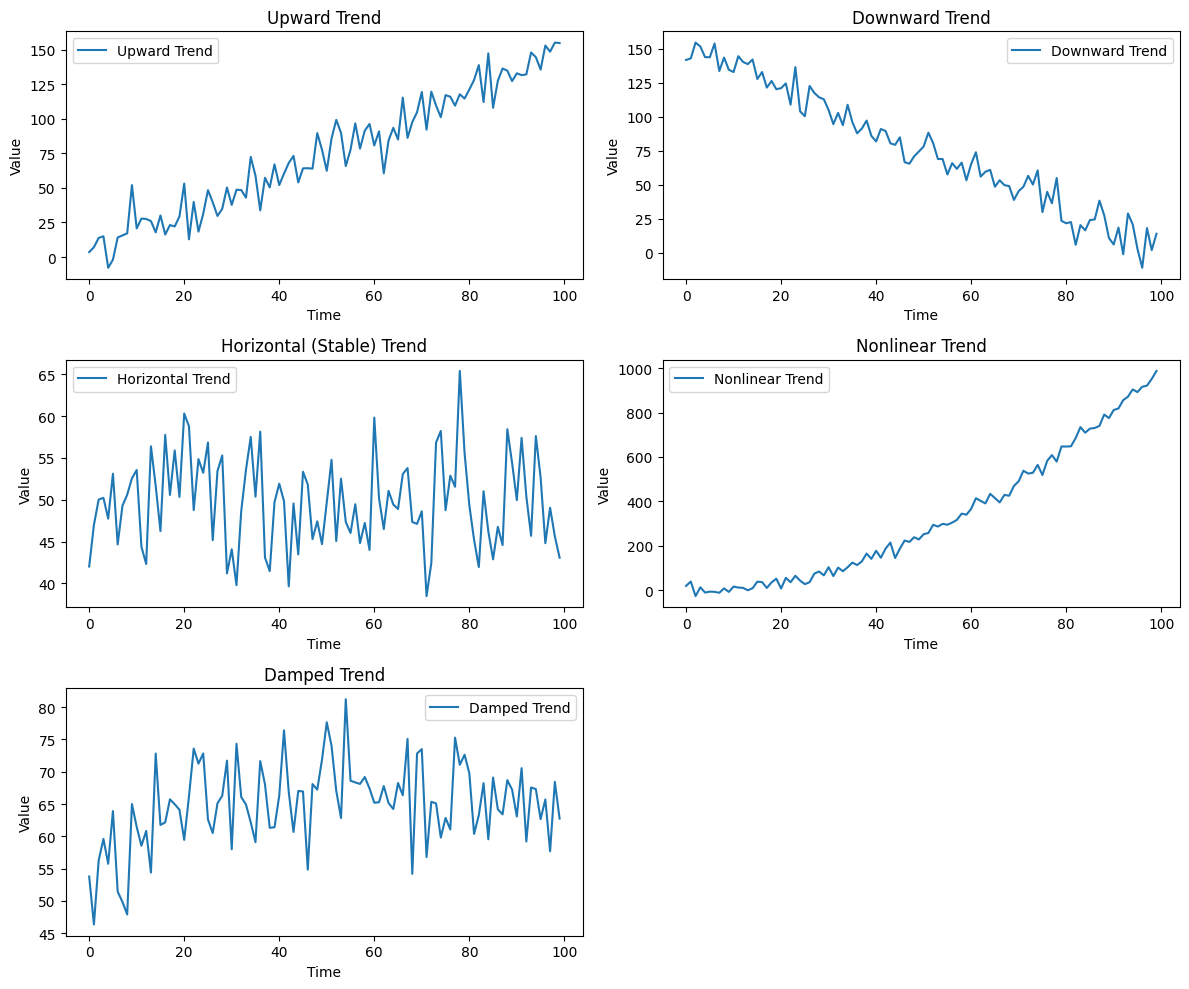

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurando as séries temporais para cada tipo de tendência
n = 100
time = np.arange(n)

# Tendência Ascendente (Upward)
upward_trend = time * 1.5 + np.random.normal(scale=10, size=n)

# Tendência Descendente (Downward)
downward_trend = -time * 1.5 + 150 + np.random.normal(scale=10, size=n)

# Tendência Horizontal (Stable)
horizontal_trend = np.full(n, 50) + np.random.normal(scale=5, size=n)

# Tendência Não Linear (Nonlinear)
nonlinear_trend = np.square(time) * 0.1 + np.random.normal(scale=20, size=n)

# Tendência Amortecida (Damped)
damped_trend = (time * np.exp(-time / 50)) + 50 + np.random.normal(scale=5, size=n)

# Criando os gráficos
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(time, upward_trend, label='Upward Trend')
plt.title('Upward Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(time, downward_trend, label='Downward Trend')
plt.title('Downward Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(time, horizontal_trend, label='Horizontal Trend')
plt.title('Horizontal (Stable) Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(time, nonlinear_trend, label='Nonlinear Trend')
plt.title('Nonlinear Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(time, damped_trend, label='Damped Trend')
plt.title('Damped Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


Deteção de Tendências

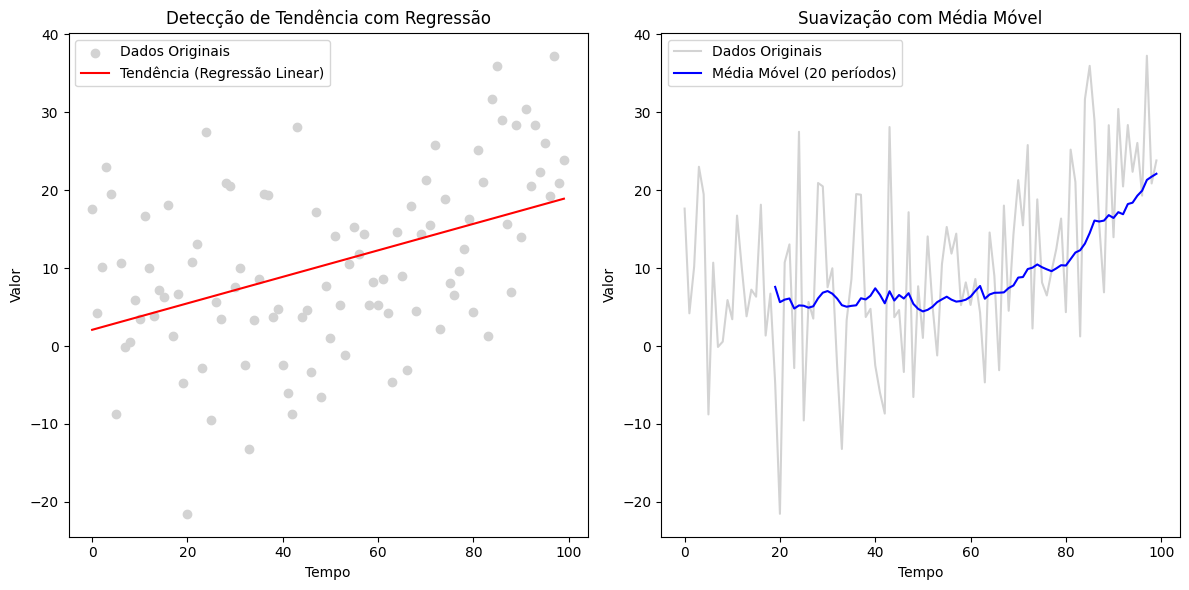

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Gerando dados com tendência linear
np.random.seed(0)
time = np.arange(100)
trend = time * 0.2 + np.random.normal(scale=10, size=time.size)  # Adicionando ruído
df = pd.DataFrame({'Time': time, 'Value': trend})

# Regressão Linear para Detecção de Tendência
model = LinearRegression()
model.fit(df[['Time']], df['Value'])
trend_line = model.predict(df[['Time']])

# Média Móvel
window_size = 20
rolling_mean = df['Value'].rolling(window=window_size).mean()

# Plotando
plt.figure(figsize=(12, 6))

# Tendência com Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(time, trend, color='lightgray', label='Dados Originais')
plt.plot(time, trend_line, color='red', label='Tendência (Regressão Linear)')
plt.title('Detecção de Tendência com Regressão')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()

# Média Móvel
plt.subplot(1, 2, 2)
plt.plot(time, trend, color='lightgray', label='Dados Originais')
plt.plot(time, rolling_mean, color='blue', label=f'Média Móvel ({window_size} períodos)')
plt.title('Suavização com Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()


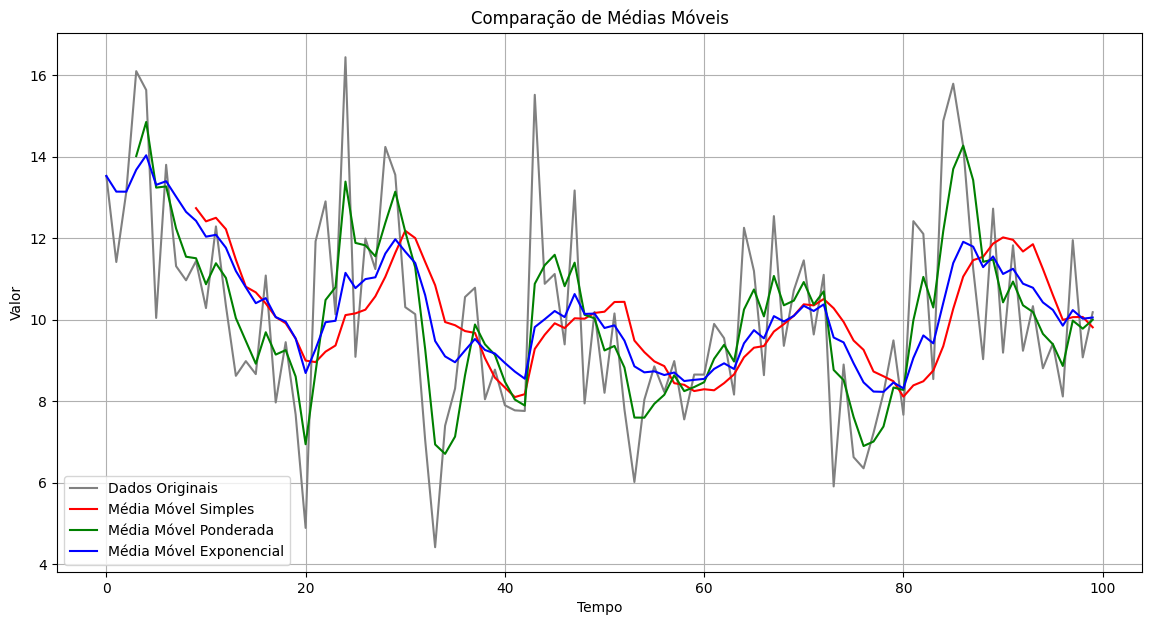

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gerando dados sintéticos
np.random.seed(0)
time = np.arange(100)
data = 10 + 2 * np.sin(np.pi * time / 10) + np.random.normal(scale=2, size=time.size)
series = pd.Series(data)

# Média Móvel Simples
window_size = 10
simple_ma = series.rolling(window=window_size).mean()

# Média Móvel Ponderada
weights = np.array([0.1, 0.2, 0.3, 0.4])  # Exemplo de pesos decrescentes
weighted_ma = series.rolling(window=len(weights)).apply(lambda x: np.dot(x, weights), raw=True)

# Média Móvel Exponencial
exponential_ma = series.ewm(span=window_size, adjust=False).mean()

# Plotando os resultados
plt.figure(figsize=(14, 7))
plt.plot(series, label='Dados Originais', color='gray')
plt.plot(simple_ma, label='Média Móvel Simples', color='red')
plt.plot(weighted_ma, label='Média Móvel Ponderada', color='green')
plt.plot(exponential_ma, label='Média Móvel Exponencial', color='blue')
plt.title('Comparação de Médias Móveis')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


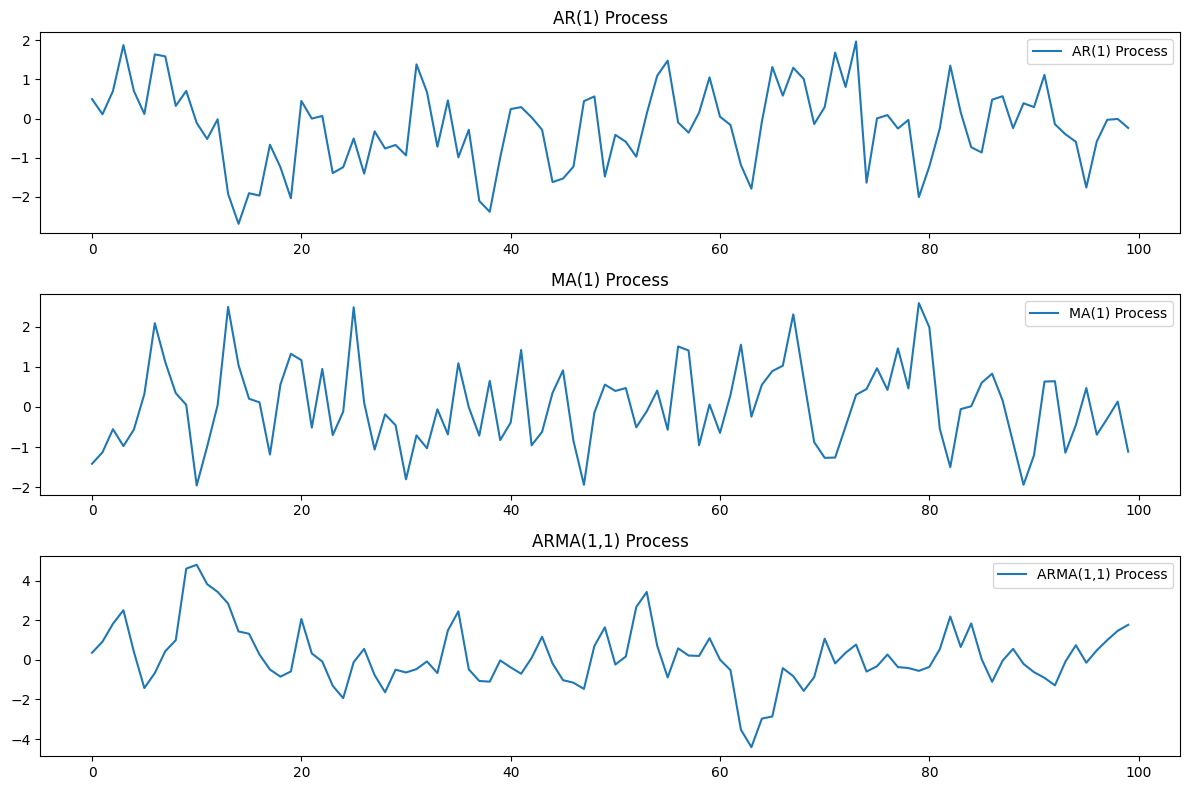

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Parâmetros para simulação
np.random.seed(42)

# AR(1) Model
# Aqui simulamos o processo: X_t=0.5 X_{t-1}+\epsilon_t
ar = np.array([1, -0.5])  # Coefficients include the AR part from lag 1
ma = np.array([1])  # MA part is just [1] as there are no MA components
AR_object = ArmaProcess(ar, ma)
ar_data = AR_object.generate_sample(nsample=100)

# MA(1) Model
ar = np.array([1])  # AR part is just [1] as there are no AR components
ma = np.array([1, 0.5])  # Coefficients include the MA part from lag 1
MA_object = ArmaProcess(ar, ma)
ma_data = MA_object.generate_sample(nsample=100)

# ARMA(1, 1) Model
ar = np.array([1, -0.5])  # Include one AR part
ma = np.array([1, 0.5])  # Include one MA part
ARMA_object = ArmaProcess(ar, ma)
arma_data = ARMA_object.generate_sample(nsample=100)

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(ar_data, label='AR(1) Process')
plt.title('AR(1) Process')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ma_data, label='MA(1) Process')
plt.title('MA(1) Process')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(arma_data, label='ARMA(1,1) Process')
plt.title('ARMA(1,1) Process')
plt.legend()

plt.tight_layout()
plt.show()


##Variações estacionárias

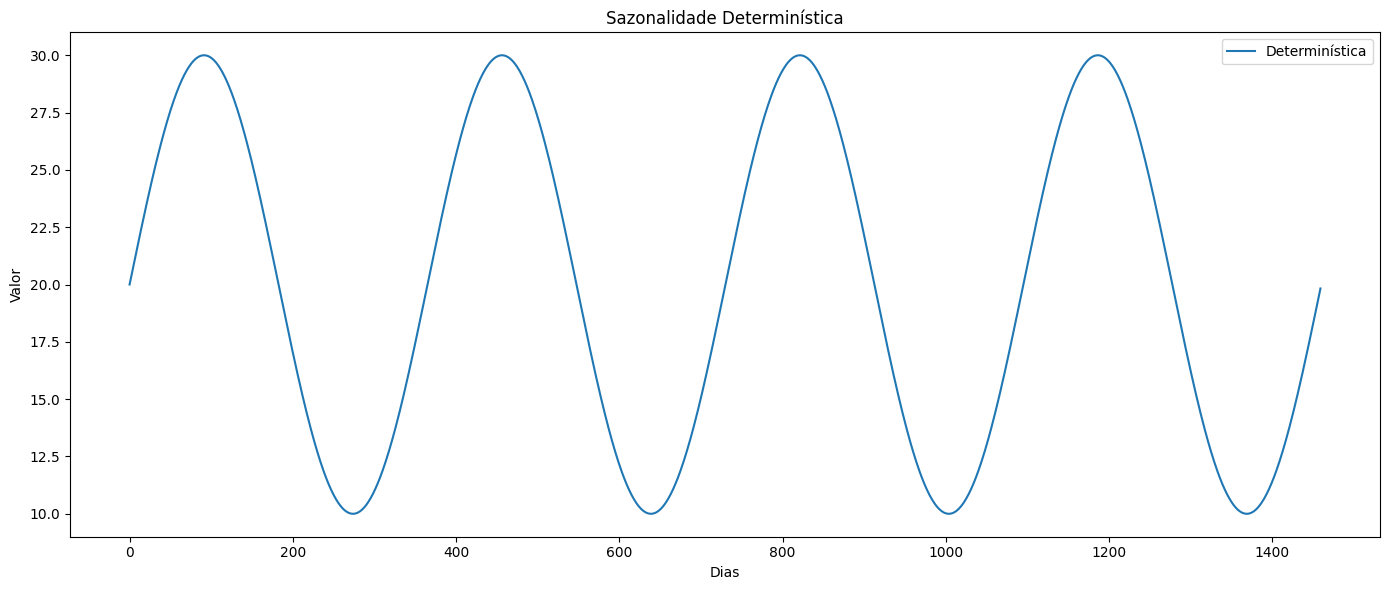

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configurações básicas
np.random.seed(0)
n = 365 * 4  # quatro anos de dados diários
time = np.arange(n)

# Sazonalidade Determinística
deterministic_seasonality = 10 * np.sin(2 * np.pi * time / 365) + 20

# Sazonalidade Estocástica
stochastic_seasonality = 10 * np.sin(2 * np.pi * time / 365 + np.random.normal(0, 0.2, n)) + 20 + np.random.normal(0, 2, n)

# Plotando
plt.figure(figsize=(14, 6))
plt.plot(time, deterministic_seasonality, label='Determinística')
plt.title('Sazonalidade Determinística')
plt.xlabel('Dias')
plt.ylabel('Valor')

plt.legend()
plt.tight_layout()
plt.show()


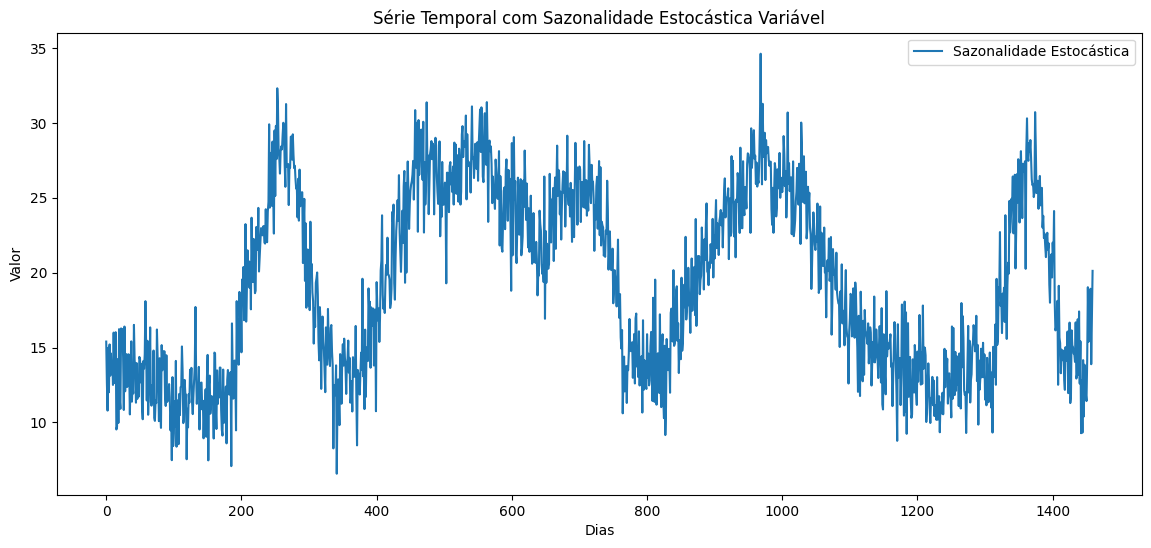

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações básicas
np.random.seed(0)
n = 365 * 4  # quatro anos de dados diários
time = np.arange(n)

# Sazonalidade Estocástica com variabilidade na amplitude e fase
# Amplitude variável ao longo do tempo (variando mais lentamente)
amplitude = np.interp(time, np.linspace(0, n, 100), 5 + 5 * np.random.rand(100))

# Deslocamento de fase aleatório (variando mais lentamente)
phase_shift = np.interp(time, np.linspace(0, n, 10), np.random.rand(10) * 2 * np.pi)

# Criando a série temporal com sazonalidade estocástica
stochastic_seasonality = amplitude * np.sin(2 * np.pi * time / 365 + phase_shift) + 20 + np.random.normal(0, 2, n)

# Plotando a série temporal
plt.figure(figsize=(14, 6))
plt.plot(time, stochastic_seasonality, label='Sazonalidade Estocástica')
plt.title('Série Temporal com Sazonalidade Estocástica Variável')
plt.xlabel('Dias')
plt.ylabel('Valor')
plt.legend()
plt.show()


##Exemplos

###Relembrando a regressão linear

In [ ]:
import pandas as pd
import numpy as np

# Dados
data = {'Área': [50, 60, 70, 80, 90, 100],
        'Preço': [200, 220, 250, 270, 300, 320]}
df = pd.DataFrame(data)

# Visualizar o DataFrame
print(df)

   Área  Preço
0    50    200
1    60    220
2    70    250
3    80    270
4    90    300
5   100    320


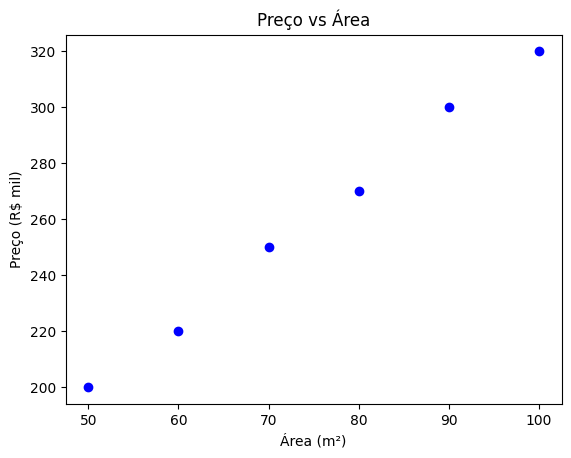

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Área'], df['Preço'], color='blue')
plt.title('Preço vs Área')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$ mil)')
plt.show()

Regressão linear:
Y = aX + b
Y = β1X + β0
Y = β1X_1 + β2X_2 + β0

β1 = soma[(Xi-Xmed)(Yi-Ymed)]/soma(Xi-Xmed)^2

A demonstração estará disponível em documento a parte.

Modelo de regressão linear:

y = β0 + β1*x1 + β2*x2 + ... + βn*xn + ε


Formuação matricial:

Y = Xβ + ε

Para encontrar os coeficientes que minimizam a soma dos quadrados dos resíduos, podemos aplicar o médotodo das equações normais.

Primeiro precisamos derivar a soma dos quadrados:

Minimizar: ε'ε = (Y - Xβ)'(Y - Xβ)

Que podemos expandir na forma:

ε'ε = Y'Y - Y'Xβ - β'X'Y + β'X'Xβ


____________________________________

Derivando a expressão em relação a β

X'Xβ = X'Y

E portanto encontramos os coefiecientes por:

β = (X'X)^{-1}X'Y

In [ ]:
import numpy as np

# Dados de entrada
X = np.array([50, 60, 70, 80, 90, 100])  # área das casas
y = np.array([200, 220, 250, 270, 300, 320])  # preço das casas

# Adicionando uma coluna de uns para intercepto
X = np.vstack([np.ones(len(X)), X]).T

# Calculando cada passo
XT = X.T
XTX = XT @ X
XTX_inv = np.linalg.inv(XTX)
XTy = XT @ y
beta = XTX_inv @ XTy

print("Matriz X Transposta (X^T):\n", XT)
print("Produto Matricial X^TX:\n", XTX)
print("Inversa de X^TX:\n", XTX_inv)
print("Produto Matricial X^Ty:\n", XTy)
print("Coeficientes da Regressão Linear (Intercepto, Inclinação):", beta)


Matriz X Transposta (X^T):
 [[  1.   1.   1.   1.   1.   1.]
 [ 50.  60.  70.  80.  90. 100.]]
Produto Matricial X^TX:
 [[6.00e+00 4.50e+02]
 [4.50e+02 3.55e+04]]
Inversa de X^TX:
 [[ 3.38095238e+00 -4.28571429e-02]
 [-4.28571429e-02  5.71428571e-04]]
Produto Matricial X^Ty:
 [  1560. 121300.]
Coeficientes da Regressão Linear (Intercepto, Inclinação): [75.71428571  2.45714286]


In [ ]:
import statsmodels.api as sm

# Adicionando uma constante (intercepto)
X = sm.add_constant(df['Área'])

# Variável dependente
y = df['Preço']

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1233.
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           3.93e-06
Time:                        01:48:17   Log-Likelihood:                -13.743
No. Observations:                   6   AIC:                             31.49
Df Residuals:                       4   BIC:                             31.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.7143      5.383     14.065      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
new_data = sm.add_constant(pd.DataFrame({'Área': [65, 85]}))
predicted_prices = model.predict(new_data)
print(predicted_prices)

0    235.428571
1    284.571429
dtype: float64


###Decomposição da série de tempo

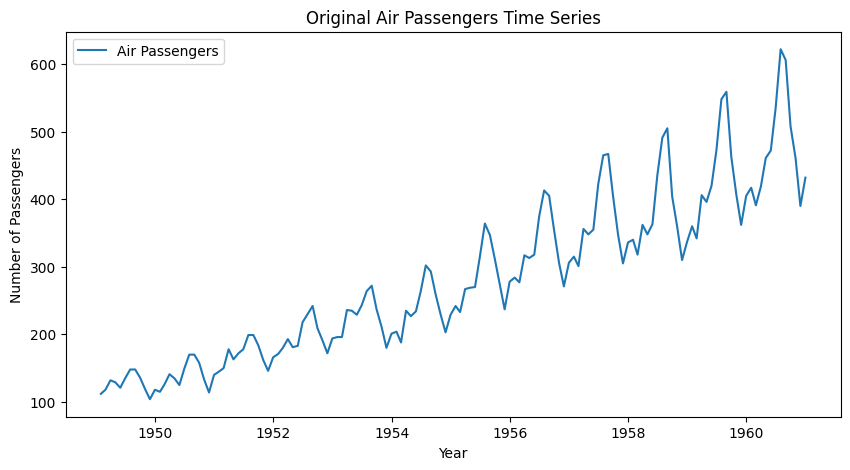

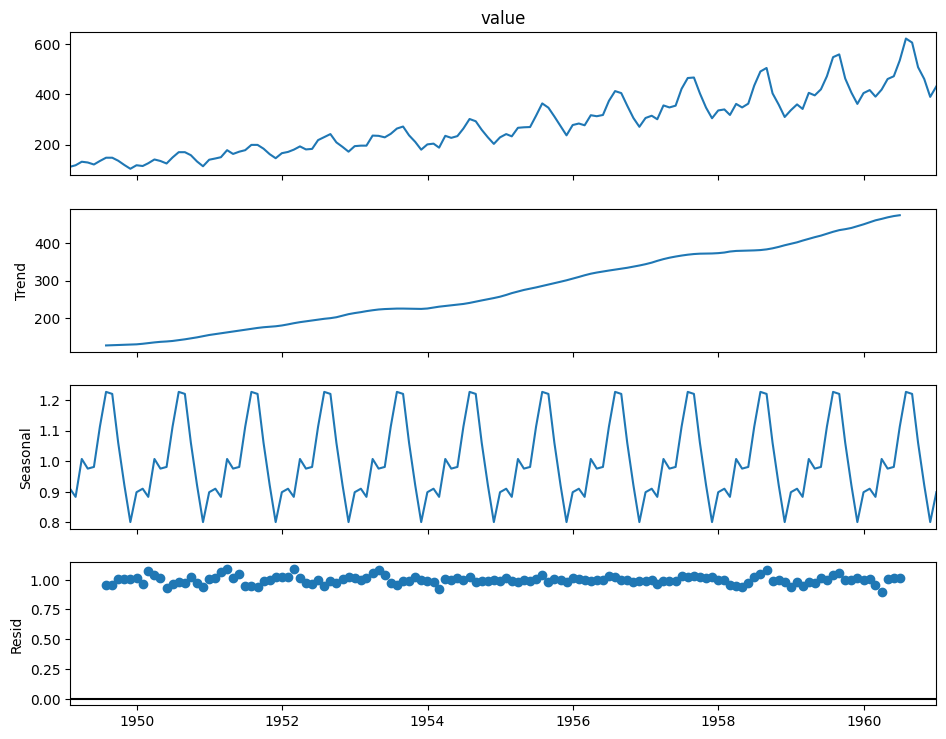

Detalhes da Tendência: {'mean_trend': 278.00126262626264, 'max_trend': 475.04166666666663, 'min_trend': 126.79166666666666}
Detalhes da Sazonalidade: {'mean_seasonality': 0.9999999999999998, 'max_seasonality': 1.2265555429312012, 'min_seasonality': 0.8011780824134743}
Detalhes do Resíduo: {'mean_residual': 0.9982356582764101, 'max_residual': 1.0939695651963173, 'min_residual': 0.8940856500108696}
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           4.02e-61
Time:                        01:17:55   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:   

In [ ]:

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt

# Carregando o dataset 'AirPassengers' do statsmodels
data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
series = data['value']

# Plotando a série original
plt.figure(figsize=(10, 5))
plt.plot(series, label='Air Passengers')
plt.title('Original Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Realizando a decomposição
decomposition = seasonal_decompose(series, model='multiplicative')

# Obtendo estatísticas da decomposição
trend = decomposition.trend.dropna()  # Removendo NaNs para cálculos
seasonal = decomposition.seasonal
residual = decomposition.resid.dropna()  # Removendo NaNs para cálculos

# Exibindo parâmetros estatísticos
trend_details = {
    'mean_trend': trend.mean(),
    'max_trend': trend.max(),
    'min_trend': trend.min()
}
seasonal_details = {
    'mean_seasonality': seasonal.mean(),
    'max_seasonality': seasonal.max(),
    'min_seasonality': seasonal.min()
}
residual_details = {
    'mean_residual': residual.mean(),
    'max_residual': residual.max(),
    'min_residual': residual.min()
}

# Plotando os componentes da decomposição
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# Exibindo os detalhes dos componentes
print("Detalhes da Tendência:", trend_details)
print("Detalhes da Sazonalidade:", seasonal_details)
print("Detalhes do Resíduo:", residual_details)

# Regressão Linear para verificar a tendência
time = np.arange(len(series))
time = sm.add_constant(time)  # Adicionando uma constante ao modelo
model = sm.OLS(series, time).fit()

# Imprimindo o resumo do modelo de regressão
print(model.summary())


<ipython-input-7-ed1e9475060e>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Preenchendo valores faltantes


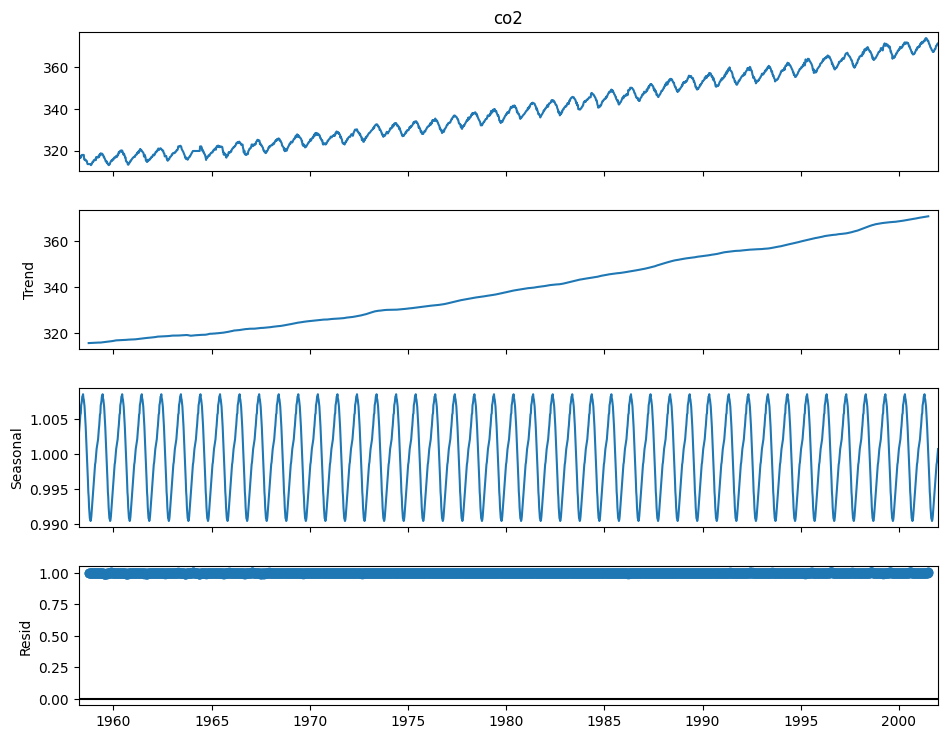

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 8.477e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:18:04   Log-Likelihood:                -5567.2
No. Observations:                2284   AIC:                         1.114e+04
Df Residuals:                    2282   BIC:                         1.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        310.4274      0.116   2678.424      0.0

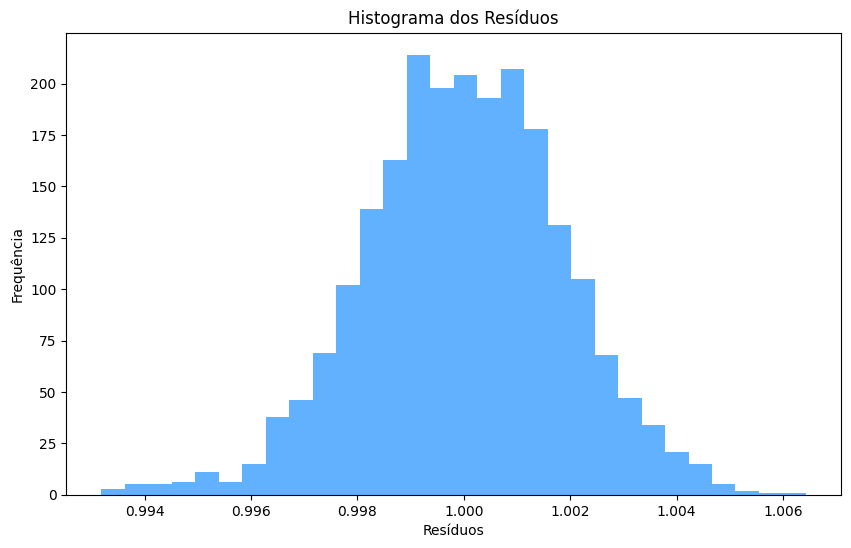

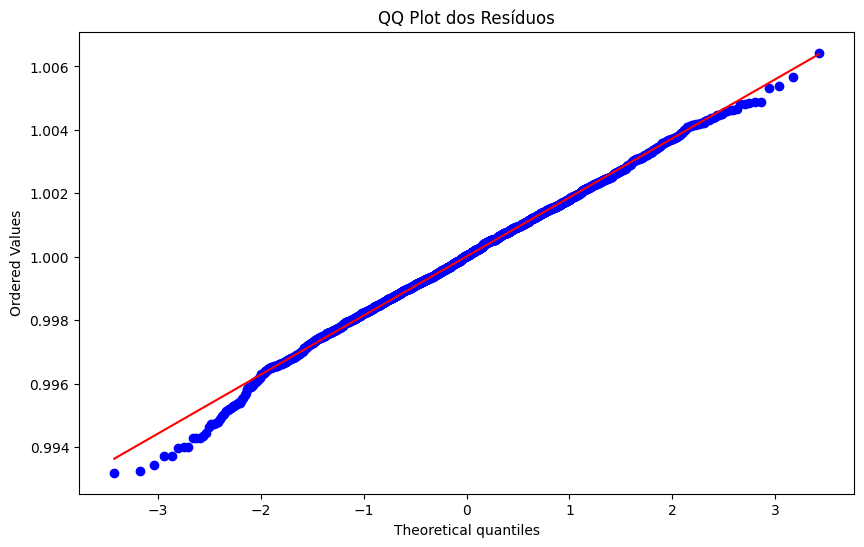

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Carregando os dados de CO2 da observação de Mauna Loa
data = co2.load_pandas().data
data.fillna(method='ffill', inplace=True)  # Preenchendo valores faltantes
data['time'] = pd.to_datetime(data.index)
data.set_index('time', inplace=True)
series = data['co2']

# Decomposição da série temporal
result = seasonal_decompose(series, model='multiplicative', period=52)

# Plotando a decomposição
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

# Regressão linear para verificar a tendência
time = np.arange(len(series))
time = sm.add_constant(time)
model = sm.OLS(series, time).fit()

# Resumo do modelo de regressão
print(model.summary())

# Análise dos resíduos
residuals = result.resid.dropna()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='dodgerblue')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# QQ plot dos resíduos
plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()


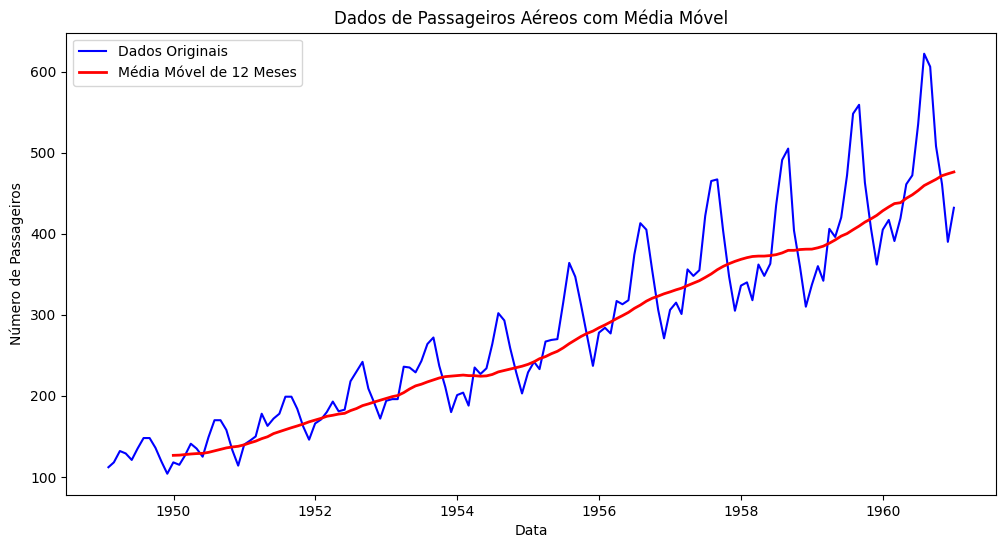

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt

# Carregando o dataset 'AirPassengers' do statsmodels
data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
series = data['value']

# Aplicando média móvel para análise de tendência
rolling_window = 12  # Janela de 12 meses para a média móvel
series_moving_avg = series.rolling(window=rolling_window).mean()

# Plotando os dados originais e a média móvel
plt.figure(figsize=(12, 6))
plt.plot(series, label='Dados Originais', color='blue')
plt.plot(series_moving_avg, label='Média Móvel de 12 Meses', color='red', linewidth=2)
plt.title('Dados de Passageiros Aéreos com Média Móvel')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

Melhor ordem: 36 com AIC: 847.4206779528344
                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  144
Model:                    AutoReg(36)   Log Likelihood                -385.710
Method:               Conditional MLE   S.D. of innovations              8.606
Date:                Mon, 09 Sep 2024   AIC                            847.421
Time:                        01:40:49   BIC                            949.342
Sample:                    01-31-1952   HQIC                           888.746
                         - 12-31-1960                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3629      4.017      2.082      0.037       0.490      16.236
value.L1       0.5625      0.096      5.869      0.000       0.375       0.750
value.L2

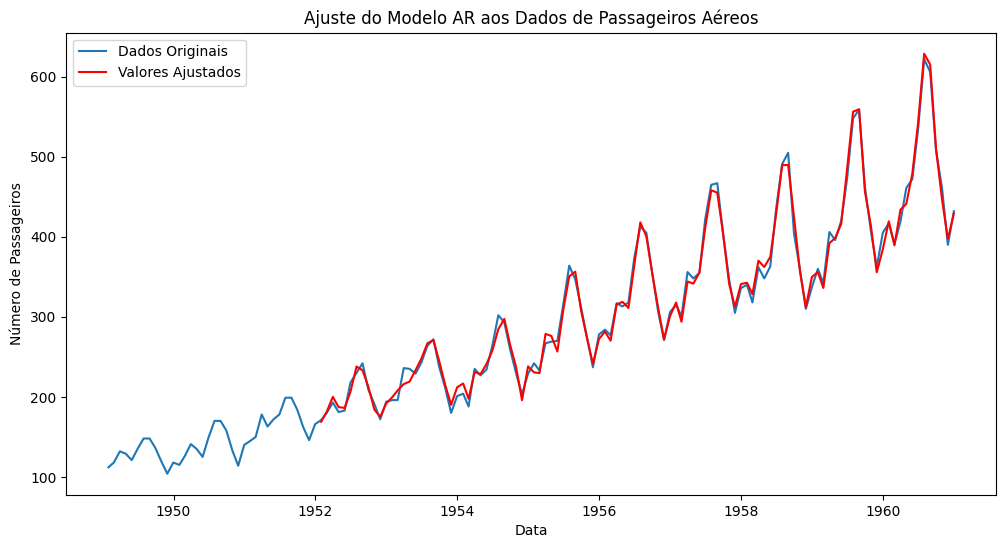

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt

# Carregando o dataset 'AirPassengers' do statsmodels
data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
series = data['value']

# Determinar a melhor ordem para o modelo AR usando AIC
aic_vals = {}
for lag in range(1, 37):  # Testar até 24 lags
    model = AutoReg(series, lags=lag)
    model_fitted = model.fit()
    aic_vals[lag] = model_fitted.aic

# Encontrar a ordem com o menor AIC
best_aic = min(aic_vals, key=aic_vals.get)
best_model = AutoReg(series, lags=best_aic).fit()

# Resultados
print(f"Melhor ordem: {best_aic} com AIC: {aic_vals[best_aic]}")
print(best_model.summary())

# Plotando os valores previstos
plt.figure(figsize=(12, 6))
plt.plot(series, label='Dados Originais')
plt.plot(best_model.predict(start=series.index[best_aic], end=series.index[-1]),
         label='Valores Ajustados', color='red')
plt.title('Ajuste do Modelo AR aos Dados de Passageiros Aéreos')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Comparação de AIC e BIC entre AR(12), AR(24) AR(36)::
AR(12) - AIC: 1089.9179595371425, BIC: 1130.2771864533515
AR(24) - AIC: 930.0208159968519, BIC: 1002.4956013091851
AR(36) - AIC: 847.4206779528344, BIC: 949.3416645835547


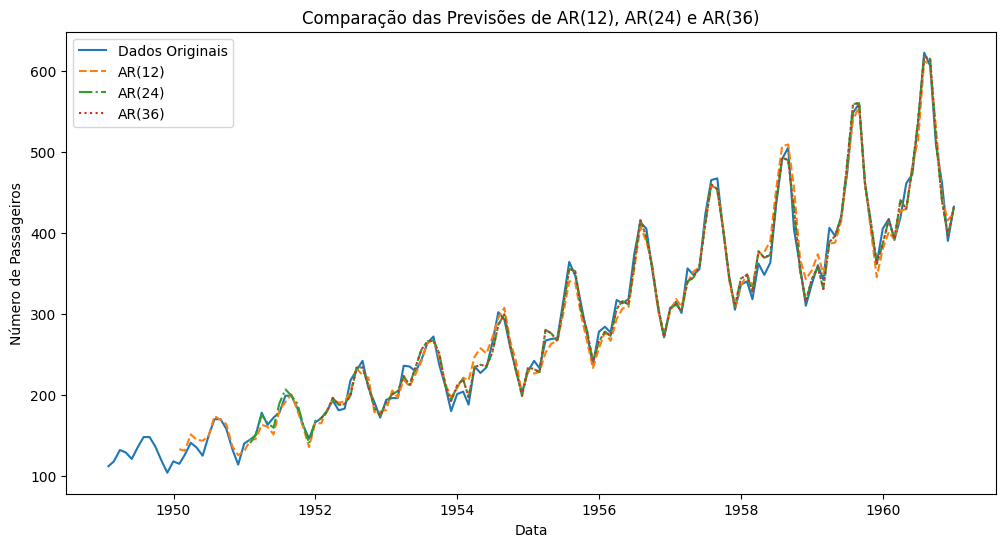

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Carregar os dados já realizado anteriormente, utilizar 'series'

# Ajustar o modelo AR(12)
model_ar12 = AutoReg(series, lags=12).fit()

# Ajustar o modelo AR(24)
model_ar24 = AutoReg(series, lags=24).fit()

# Ajustar o modelo AR(36)
model_ar36 = AutoReg(series, lags=36).fit()


# Comparar as métricas
print("Comparação de AIC e BIC entre AR(12), AR(24) AR(36)::")
print(f"AR(12) - AIC: {model_ar12.aic}, BIC: {model_ar12.bic}")
print(f"AR(24) - AIC: {model_ar24.aic}, BIC: {model_ar24.bic}")
print(f"AR(36) - AIC: {model_ar36.aic}, BIC: {model_ar36.bic}")

# Plotar previsões para comparação visual
plt.figure(figsize=(12, 6))
plt.plot(series, label='Dados Originais')
plt.plot(model_ar12.predict(start=series.index[12], end=series.index[-1]), label='AR(12)', linestyle='--')
plt.plot(model_ar24.predict(start=series.index[24], end=series.index[-1]), label='AR(24)', linestyle='-.')
plt.plot(model_ar24.predict(start=series.index[36], end=series.index[-1]), label='AR(36)', linestyle=':')
plt.title('Comparação das Previsões de AR(12), AR(24) e AR(36)')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()


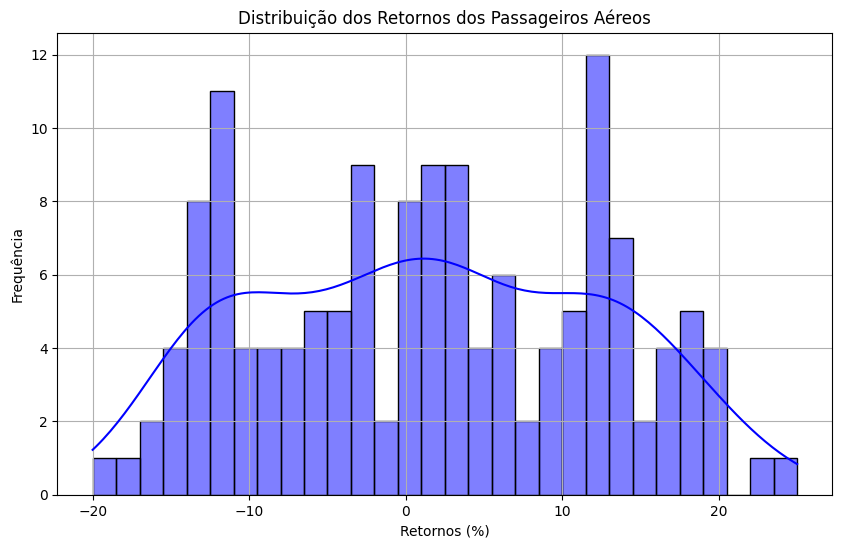

In [ ]:
import pandas as pd
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset 'AirPassengers' do statsmodels
data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
series = data['value']

# Calculando os retornos (diferenças percentuais)
returns = series.pct_change().dropna() * 100  # Convertendo para percentual

# Plotando a distribuição dos retornos
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=30, kde=True, color='blue')
plt.title('Distribuição dos Retornos dos Passageiros Aéreos')
plt.xlabel('Retornos (%)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()